# Librairies

In [2]:
import numpy as np
import pandas as pd
import random
import os
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from itertools import combinations

# Data import

In [3]:
PATH_DATA = "../data/EuroMillions_numbers.csv"
df = pd.read_csv(PATH_DATA, sep=";")
df

,Date,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
0,2004-12-24,3,27,29,4,37,6,5,1,10000000
1,2004-12-17,49,22,19,15,46,9,2,1,26215627
2,2004-11-26,24,1,34,4,36,8,6,1,43756502
3,2004-10-22,9,25,1,40,23,3,9,1,25059130
4,2004-01-10,48,20,45,21,12,6,5,1,29785269
...,...,...,...,...,...,...,...,...,...,...
1313,2021-01-15,4,10,27,38,40,3,11,0,56331898
1314,2021-12-01,2,10,18,34,35,6,9,0,41607178
1315,2021-08-01,18,23,37,41,42,4,6,0,30824040
1316,2021-05-01,12,34,37,38,42,1,3,0,17000000


# View data

On constate que dans notre dataset chaque combinaison gagnante est unique, autrement dit chaque combinaison n'est tombé qu'une seul fois.

In [4]:
df[["N1","N2","N3","N4","N5","E1","E2"]].value_counts()

N1  N2  N3  N4  N5  E1  E2
50  49  21  9   14  8   3     1
11  13  25  32  50  7   4     1
    14  29  6   19  3   1     1
    15  21  27  35  4   5     1
        35  41  50  5   8     1
                             ..
28  18  29  6   9   9   1     1
        40  27  35  3   5     1
    23  5   11  17  10  11    1
    25  5   11  16  7   9     1
1   2   5   21  32  2   12    1
Length: 1318, dtype: int64

On peut voir le nombre de fois que chaque nombre est tombé : 

<AxesSubplot:title={'center':"Récurence d'apparition des numéros sur le tirage gagant"}, xlabel='index', ylabel='0'>

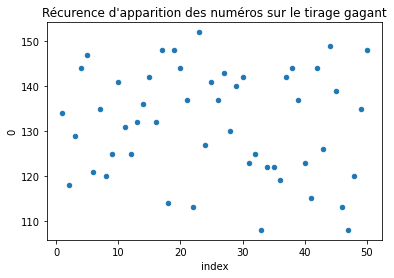

In [5]:
list_series = [df["N1"],df["N2"],df["N3"],df["N4"],df["N5"]]
s_rec = pd.concat(list_series).value_counts()
df_rec = s_rec.reset_index()
df_rec.plot(x="index",y=0,kind='scatter',title="Récurence d'apparition des numéros sur le tirage gagant")

De même avec les numéros étoiles

<AxesSubplot:title={'center':"Récurence d'apparition des numéros étoiles sur le tirage gagant"}, xlabel='index', ylabel='0'>

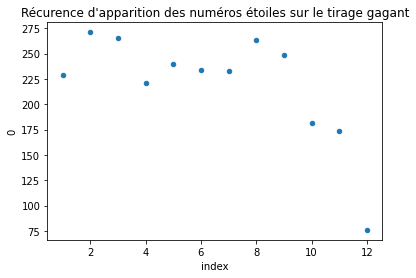

In [6]:
list_series = [df["E1"],df["E2"]]
s_rec_etoile = pd.concat(list_series).value_counts()
df_rec_etoile = s_rec_etoile.reset_index()
df_rec_etoile.plot(x="index",y=0,kind='scatter',title="Récurence d'apparition des numéros étoiles sur le tirage gagant")

Il ne semble pas y avoir de lien entre le tirage gagnant et les chiffre à première vue 

In [7]:
np_df = df.sort_values(by="Date").to_numpy()

N_E_compteur = np.zeros(50+12, dtype=np.int)
arr_N_E_compteur = np.zeros((df.shape[0],50+12))
for i in range(np_df.shape[0]):
    index = np.add(np_df[i][1:6],-1)
    index = np.array(index,dtype=int)
    N_E_compteur[index] += 1
    index = np.add(np_df[i][6:8],-1+50)
    index = np.array(index,dtype=int)
    N_E_compteur[index] += 1
    arr_N_E_compteur[i] = N_E_compteur.copy()
arr_N_E_compteur

arr_N_E_bool = np.zeros((df.shape[0],50+12))
for i in range(np_df.shape[0]):
    N_E_bool = np.zeros(50+12, dtype=np.int)
    index = np.add(np_df[i][1:6],-1)
    index = np.array(index,dtype=int)
    N_E_bool[index] += 1
    index = np.add(np_df[i][6:8],-1+50)
    index = np.array(index,dtype=int)
    N_E_bool[index] += 1
    arr_N_E_bool[i] = N_E_bool
arr_N_E_bool

def all_func(func,arr):
    res = []
    for i in range(arr.shape[1]):
        sub=[]
        for j in range(arr.shape[1]):
            r = func(arr[:,1],arr[:,2])  
            sub.append(r)
        res.append(sub)
    return res

#test = all_func(np.corrcoef,arr_N_E_bool)
#pd.DataFrame(test)
df_N_E_compteur = pd.DataFrame(arr_N_E_compteur)
df_N_E_bool = pd.DataFrame(arr_N_E_bool)
df_N_E_bool

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data augmentation

On ajoute une colonne "Ticket Gagnant" pour différencier les tirage gagnant des tirages perdant

In [8]:
df["Ticket Gagnant"] = 1

On augmente nos données pour obtenir un ration de 80% de tirage perdant pour 20% de tirage gagnant

In [9]:
def create_draws(df):
    np_df = df.to_numpy()
    possible_draw = list(combinations(range(1,51),5))
    possible_draw_star = list(combinations(range(1,13),2))
    nb_draw = 4
    add_raws = []
    for winner_draw in np_df:
        list_star_draw = random.sample(possible_draw_star,k=nb_draw+1)
        list_draw = random.sample(possible_draw,k=nb_draw+1)
        new_draws = []
        for i in range(nb_draw+1):
            np_possible_draw = np.array(list_draw[i])
            np_possible_draw_star = np.array(list_star_draw[i])
            if not (((np_possible_draw) == sorted(winner_draw[1:6])).all() and (np_possible_draw_star == sorted(winner_draw[6:8])).all()):
                possible_draw_rd = random.sample(list_draw[i],k=5)
                possible_draw_star_rd = random.sample(list_star_draw[i],k=2)
                new_draw = [winner_draw[0], *possible_draw_rd, *possible_draw_star_rd, *winner_draw[8:10], 0]
                new_draws.append(new_draw)
        if len(new_draws) > nb_draw:
            new_draws.pop(0)
        add_raws += new_draws
    l_df = np_df.tolist() + add_raws
    return pd.DataFrame(l_df, columns=df.columns)

df_aug = create_draws(df)

In [10]:
df_aug = df_aug.sort_values(by="Date")
df_aug = df_aug.set_index([df_aug["Date"],df_aug.index])
df_aug = df_aug.drop(columns=["Date"])
df_aug
# new_df.set_index([df["Date"],]).sort_index(by="Date")

N1  N2  N3  N4  N5  E1  E2  Winner      Gain  Ticket Gagnant
Date                                                                         
2004-01-10 1337  48  43  37   4  33   2   3       1  29785269               0
           4     48  20  45  21  12   6   5       1  29785269               1
           1336  42   4  12  27   6   8  10       1  29785269               0
           1335  27  32   7  16  26  12   4       1  29785269               0
           1334  19  35   7  16  40   6  10       1  29785269               0
...              ..  ..  ..  ..  ..  ..  ..     ...       ...             ...
2021-12-01 6577   1  37  39  40  38  12   1       0  41607178               0
           6576   4  13  15  45  40  12   7       0  41607178               0
           6575  33  18   2  26   8   6   7       0  41607178               0
           6574  11   3  28  13  50   7   8       0  41607178               0
           1314   2  10  18  34  35   6   9       0  41607178               1

[6590 rows x 10 columns]

On ajoute des features potentiellement explicativent 

In [61]:
def change2bool(df):
    np_df = df.sort_values(by="Date").to_numpy()
    
    arr_N_E_bool = np.zeros((df.shape[0],50+12))
    for i in range(np_df.shape[0]):
        N_E_bool = np.zeros(50+12, dtype=np.int)
        index = np.add(np_df[i,1:6],-1)
        index = np.array(index,dtype=int)
        N_E_bool[index] = 1
        index = np.add(np_df[i,6:8],-1+50)
        index = np.array(index,dtype=int)
        N_E_bool[index] = 1
        arr_N_E_bool[i] = N_E_bool
    columns = list(range(1,50+12+1))
    df_N_E_bool = pd.DataFrame(arr_N_E_bool,columns=columns)
    return df_N_E_bool

def change2count(df):
    np_df = df.sort_values(by="Date").to_numpy()
    
    N_E_compteur = np.zeros(50+12, dtype=np.int)
    arr_N_E_compteur = np.zeros((df.shape[0],50+12))
    for i in range(np_df.shape[0]):
        index = np.add(np_df[i][1:6],-1)
        index = np.array(index,dtype=int)
        N_E_compteur[index] += 1
        index = np.add(np_df[i][6:8],-1+50)
        index = np.array(index,dtype=int)
        N_E_compteur[index] += 1
        N_min = np.amin(N_E_compteur[:50])
        E_min = np.amin(N_E_compteur[50:])
        N_compteur = np.subtract(N_E_compteur[:50],N_min,dtype=int)
        E_compteur = np.subtract(N_E_compteur[50:],E_min,dtype=int)
        arr_N_E_compteur[i,:50] = N_compteur
        arr_N_E_compteur[i,50:] = E_compteur
        
    columns = list(range(1,50+12+1))
    df_N_E_compteur = pd.DataFrame(arr_N_E_compteur,columns=columns)
    return df_N_E_compteur

df_bool = change2bool(df)
#df_bool["Ticket Gagnant"] = df_aug["Ticket Gagnant"]
df_count = change2count(df)


,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.0
1,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.005952,0.000000,0.005263,0.000,0.000000,0.0
2,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.047619,0.000000,...,0.005208,0.000000,0.000000,0.00000,0.011905,0.000000,0.005263,0.000,0.000000,0.0
3,0.000000,0.000000,0.00,0.024390,0.0,0.000000,0.033333,0.000000,0.047619,0.000000,...,0.005208,0.000000,0.005495,0.00000,0.011905,0.000000,0.005263,0.000,0.000000,0.0
4,0.034483,0.000000,0.04,0.024390,0.0,0.000000,0.033333,0.000000,0.047619,0.000000,...,0.005208,0.000000,0.005495,0.00625,0.011905,0.000000,0.005263,0.000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,0.896552,0.750000,0.84,0.878049,1.0,0.619048,0.900000,0.857143,0.809524,0.888889,...,0.984375,0.960265,0.901099,0.97500,0.940476,0.979167,0.905263,0.848,0.916667,0.0
1314,0.896552,0.750000,0.84,0.878049,1.0,0.619048,0.900000,0.857143,0.809524,0.888889,...,0.979167,0.953642,0.895604,0.96875,0.934524,0.973958,0.905263,0.840,0.907407,0.0
1315,0.896552,0.750000,0.84,0.878049,1.0,0.619048,0.900000,0.857143,0.809524,0.888889,...,0.984375,0.953642,0.895604,0.96875,0.934524,0.973958,0.905263,0.840,0.907407,0.0
1316,0.896552,0.750000,0.84,0.878049,1.0,0.619048,0.900000,0.857143,0.809524,0.888889,...,0.984375,0.960265,0.895604,0.97500,0.934524,0.973958,0.905263,0.840,0.907407,0.0


# Répartition des données en train et test

In [12]:
from sklearn.model_selection import train_test_split

X = df_aug[["N1","N2","N3","N4","N5","E1","E2",]]
y = df_aug[["Ticket Gagnant"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
y_train = np.ravel(y_train)

In [13]:
from sklearn.model_selection import train_test_split

X = df_bool[list(range(1,50+12+1))]
y = df_bool["Ticket Gagnant"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
#y_train = np.ravel(y_train)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_count = pd.DataFrame(MinMaxScaler().fit_transform(df_count), columns=df_count.columns)
X = df_count.iloc[:-1]
y = df_bool.iloc[1:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
#y_train = np.ravel(y_train)

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.0

In [40]:
confusion_matrix(y_test, y_pred)

ValueError: multilabel-indicator is not supported

In [115]:
test = np.array(y_pred_prob)
T_test = test[:,0,1]
#N_index = np.argpartition(T_test[:50], -5)[-5:]
#T_test[N_index]
E_index = np.argpartition(T_test[-12:], -2)[-2:] + 50
T_test[E_index]
#T_test[50:].sort()
#E_test = np.sort(T_test[50:])
#Tirage = np.append(N_test[:],E_test)

array([0.08, 0.41, 0.02, 0.35, 0.  , 0.13, 0.5 , 0.36, 0.01, 0.03, 0.08,
       0.03])

# Enregistrement du modèle 

In [17]:
import pickle

def save_model(clf):
   file_name = "../app/models/model.pkl"
   if os.path.exists(file_name):
      os.remove(file_name) 
   with open(file_name, 'wb') as f:
      pickle.dump(clf,file=f)
   return 0
